[Continue at: Performing operations with Operator and Statevector
](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems#performing-operations-with-operator-and-statevector)

[IBM Quantum Learning](https://learning.quantum.ibm.com/)\
[Basics of quantum information](https://learning.quantum.ibm.com/course/basics-of-quantum-information)\
[Single systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems)


## Qiskit examples

### Vectors and matrices in Python

In [1]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

ket0 / 2 + ket1 / 2

array([0.5, 0.5])

M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1, M2

In [2]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the 'matmul' function from 'NumPy':

In [3]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [4]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v and w have been defined.")

State vectors u, v and w have been defined.


The 'Statevector' class provides a 'draw' method for displaying state vectors, including 'latex' and 'text' options for different visualizations, as this code cell demonstrates:

In [5]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [6]:
display(u.is_valid())
display(w.is_valid())

True

False

### Simulating measurements using 'Statevector'

Next we will see one way the measurements of quantum states can be simulated in Qiskit, using the 'measure' method from the 'Statevector' class.
First, we create a qubit state vector 'v' and then display it.

In [7]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")
v.measure()

# invalid quantum state vector
# e = Statevector([(1 + 2.0j), -2])
# e.draw("latex")
# e.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 562, '1': 438}

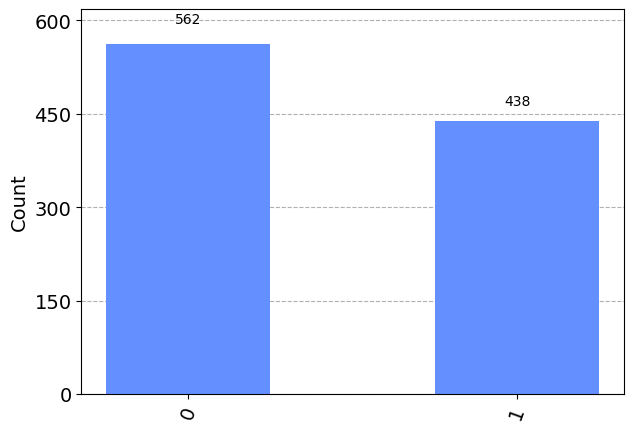

In [8]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

### Performing operations with 'Operator' and 'Statevector'

Unitary operations can be defined and performed on state vectors in Qiskit using the 'Operator' class, as in the example that follows.

In [9]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")


[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

### Looking ahead toward quantum circuits

We may define a quantum circuit as a sequence of unitary operations acting on qubits.

In [10]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()


┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [11]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

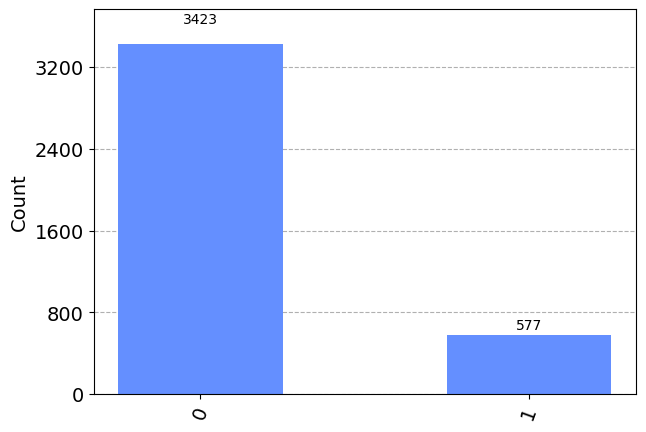

In [12]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

In [20]:
# Checking the result

# Calculate the probability of the state vector to be 0:

bra_0 = array([[1, 0]])
bra_1 = array([[0, 1]])

V = array([[0.853 + 0.353j], 
			  [-0.353+0.146j]])
pr_0 = abs(matmul(bra_0, V))**2
pr_1 = abs(matmul(bra_1, V))**2

print(f"Pr(outcome is 0) = {pr_0}")
print(f"Pr(outcome is 1) = {pr_1}")

Pr(outcome is 0) = [[0.852218]]
Pr(outcome is 1) = [[0.145925]]
